<ipython-input-9-82b2671fce5c>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


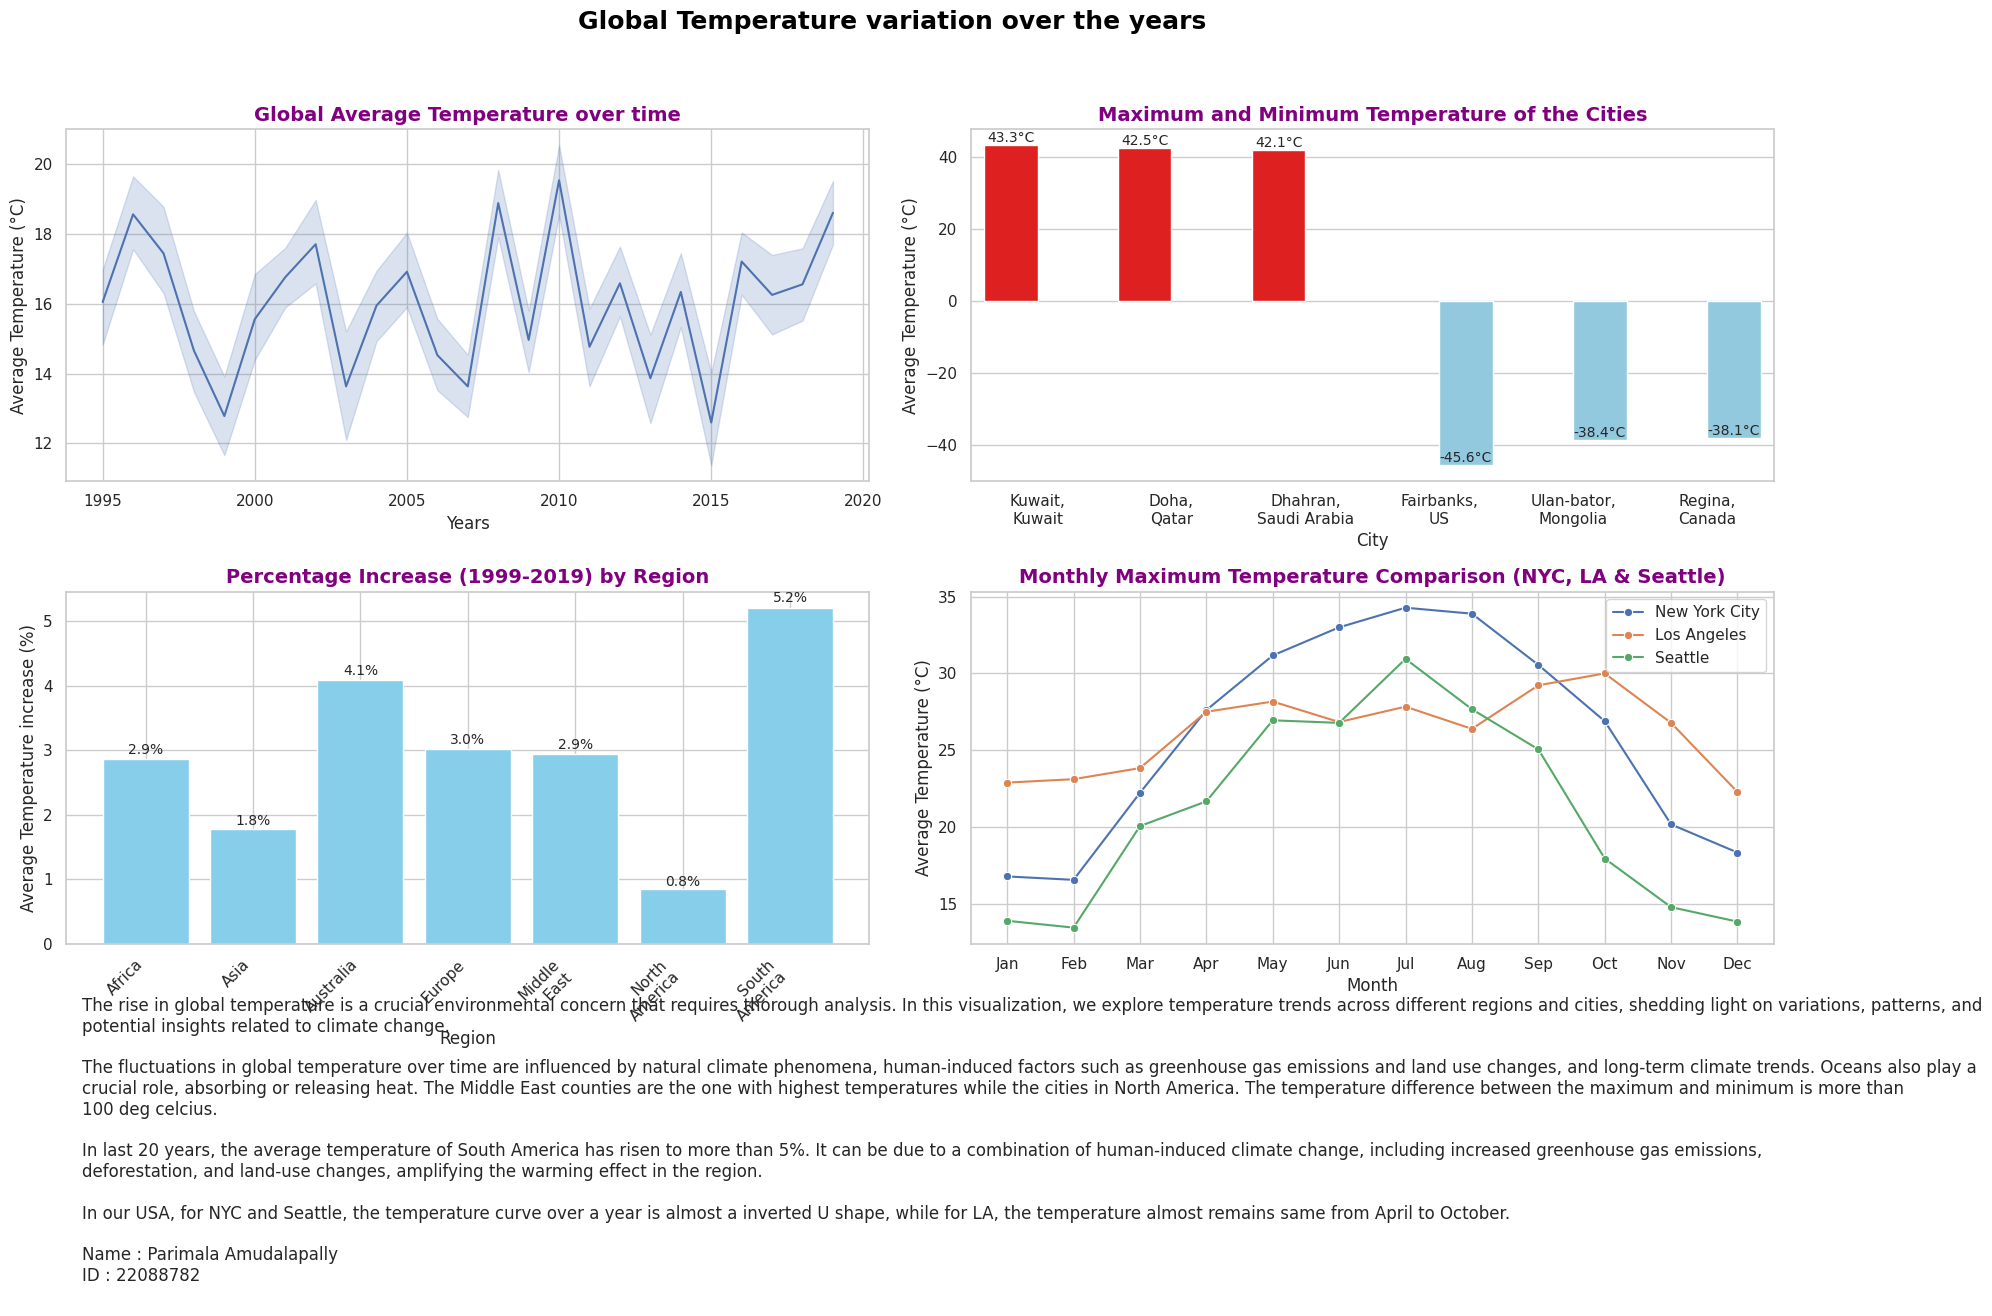

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Data Pre-processing

# loading the data
df = pd.read_csv("data.csv")
df = df.copy()  # Create a copy to avoid SettingWithCopyWarning

# removing the state column as it only has information for US
df = df.drop(columns=['State'])

# some basic data cleaning
df = df[df['Day'] > 0]
df = df[df['Year'] >= 1994]
df = df[df['Year'] < 2020]
df = df[df['AvgTemperature'] > -70]

# renaming for easiness
df['Region'].replace({'Australia/South Pacific': 'Australia',
                      'South/Central America & Carribean': 'South America'}, inplace=True)

# converting the Fahrenheit to Celsius
df['AvgTemperature'] = (df['AvgTemperature'] - 32) * (5/9)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(df['Region'].unique()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Global Average Temperature Over Time
ax1 = sns.lineplot(x='Year', y='AvgTemperature', data=df.sample(1000),
                   markers=True, dashes=False, errorbar=('ci', 50), ax=ax1)
ax1.set_title('Global Average Temperature over time',
              color='purple', fontsize=14,  fontweight='bold')
ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Average Temperature (°C)', fontsize=12)
# ax1.set_xticklabels(fontsize=12)
# ax1.set_yticklabels(fontsize=12)


# 2 countries with maximum and minimum temperature
top_n = 3

hotest_counties = df.groupby(['Country', 'City']).agg({'AvgTemperature': np.max})
hotest_counties = hotest_counties.sort_values(['AvgTemperature'], ascending=False).reset_index()
hotest_counties = hotest_counties.iloc[:top_n, :]
hotest_counties['Weather'] = "Hot"

coldest_countries = df.groupby(['Country', 'City']).agg({'AvgTemperature': np.min})
coldest_countries = coldest_countries.sort_values(['AvgTemperature'], ascending=True).reset_index()
coldest_countries = coldest_countries.iloc[:top_n, :]
coldest_countries['Weather'] = "Cold"

# combining the dataframes
df_weather = pd.concat([hotest_counties, coldest_countries]).reset_index(drop=True)
df_weather['City_Country'] = df_weather['City'] + ",\n" + df_weather['Country']

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 6))

colors = ['red' if i > 0 else 'blue' for i in df_weather['AvgTemperature'].values]
colors = ['red', 'skyblue']
ax2 = sns.barplot(x="City_Country", y="AvgTemperature", data=df_weather,
                  hue="Weather", palette=colors, ax=ax2)

ax2.get_legend().set_visible(False)
ax2.set_title('Maximum and Minimum Temperature of the Cities',
              color='purple', fontsize=14, fontweight='bold')
ax2.set_xlabel('City', fontsize=12)
ax2.set_ylabel('Average Temperature (°C)', fontsize=12)

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1f}°C', (p.get_x() + p.get_width() / 2.0, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)


# Filter the data for the years 1999 and 2019
data_1999 = df[df['Year'] == 1999]
data_2019 = df[df['Year'] == 2019]

# Group by region and calculate the average temperature for each year
avg_temp_1999 = data_1999.groupby('Region')['AvgTemperature'].mean()
avg_temp_2019 = data_2019.groupby('Region')['AvgTemperature'].mean()

# Calculate the percentage increase
percentage_increase = ((avg_temp_2019 - avg_temp_1999) / avg_temp_1999) * 100

# Bar plot for temperature in 1999
bars = ax3.bar(np.arange(len(avg_temp_1999)), percentage_increase, color='skyblue')

# Percentage increase annotations on top of each bar
for bar, increase in zip(bars, percentage_increase):
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.01,
            f'{increase:.1f}%', ha='center', va='bottom', fontsize=10)

# Set plot properties
ax3.set_title('Percentage Increase (1999-2019) by Region',
              color='purple', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Temperature increase (%)', fontsize=12)
ax3.set_xlabel('Region', fontsize=12)

# Set x-axis ticks and labels
region_labels = list(df['Region'].unique())
ax3.set_xticks(np.arange(len(region_labels)))
ax3.set_xticklabels([label.replace(" ", "\n") for label in region_labels], rotation=45, ha='right')



# 4 Temperature variation in USA
# Filter the data for New York City and Los Angeles
nyc_data = df[(df['City'] == 'New York City')]
la_data = df[(df['City'] == 'Los Angeles')]
seattle_data = df[(df['City'] == 'Seattle')]


# Group by month and calculate the average temperature
nyc_monthly_avg = nyc_data.groupby('Month')['AvgTemperature'].max()
la_monthly_avg = la_data.groupby('Month')['AvgTemperature'].max()
seattle_monthly_avg = seattle_data.groupby('Month')['AvgTemperature'].max()

# Replace the month numbers with month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nyc_monthly_avg.index = month_names
la_monthly_avg.index = month_names
seattle_monthly_avg.index = month_names


sns.lineplot(x=nyc_monthly_avg.index, y=nyc_monthly_avg, label='New York City', marker='o', ax=ax4)
sns.lineplot(x=la_monthly_avg.index, y=la_monthly_avg, label='Los Angeles', marker='o', ax=ax4)
sns.lineplot(x=seattle_monthly_avg.index, y=seattle_monthly_avg, label='Seattle', marker='o', ax=ax4)

ax4.set_title('Monthly Maximum Temperature Comparison (NYC, LA & Seattle)',
              color='purple', fontsize=14,  fontweight='bold')
ax4.set_xlabel('Month')
ax4.set_ylabel('Average Temperature (°C)')

fig.suptitle('Global Temperature variation over the years', fontsize=18,
             fontweight='bold', color='black')

# Add explanations at the bottom
explanation_text = """
The rise in global temperature is a crucial environmental concern that requires thorough analysis. In this visualization, we explore temperature trends across different regions and cities, shedding light on variations, patterns, and
potential insights related to climate change.

The fluctuations in global temperature over time are influenced by natural climate phenomena, human-induced factors such as greenhouse gas emissions and land use changes, and long-term climate trends. Oceans also play a
crucial role, absorbing or releasing heat. The Middle East counties are the one with highest temperatures while the cities in North America. The temperature difference between the maximum and minimum is more than
100 deg celcius.

In last 20 years, the average temperature of South America has risen to more than 5%. It can be due to a combination of human-induced climate change, including increased greenhouse gas emissions,
deforestation, and land-use changes, amplifying the warming effect in the region.

In our USA, for NYC and Seattle, the temperature curve over a year is almost a inverted U shape, while for LA, the temperature almost remains same from April to October.

Name : Parimala Amudalapally
ID : 22088782
"""

# bbox_style = dict(boxstyle='round', edgecolor='black', facecolor='lightyellow', alpha=0.7)
fig.text(0.05, -0.1, explanation_text, ha='left', va='bottom',
         fontsize=12) #, bbox=bbox_style, transform=fig.transFigure, verticalalignment='center')


plt.tight_layout(rect=[0, 0.1, 1, 0.95])

plt.savefig("22088782.png", bbox_inches='tight', dpi=300)